In [1]:
import matrizes
import tensor3
from edp import laplace_2d, poisson_3d, propagate
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from math import ceil, floor
from copy import deepcopy
# %matplotlib widget


# un = UnitRegistry()

tamanho_mark = 1
tamanho_plot = (7, 7)


# Exemplo do Giordano

In [2]:
# dimensao_ex = (7, 7)
# L_ex = 1
# dx_ex = L_ex / dimensao_ex[0]
# V0_ex = matrizes.inicializar(dim=dimensao_ex)
# V0_ex = matrizes.metal_esq(V0_ex, -1.0)
# V0_ex = matrizes.metal_dir(V0_ex, 1.0)
# V0_ex[:, 0] = np.linspace(-1.0, 1.0, dimensao_ex[0])
# V0_ex[:, -1] = np.linspace(-1.0, 1.0, dimensao_ex[0])

# pos_ex = matrizes.id_cond_contorno(V0_ex)
# V0_ex = matrizes.inf_para_zero(V0_ex)

# V1_ex, _ = laplace.update_V(pos_ex, V0_ex)
# V9_ex = deepcopy(V1_ex)

# # matrizes.mprint(V0_ex)
# # print()
# # matrizes.mprint(V1_ex)
# # print()

# for i in range(8):
#     V9_ex, _ = laplace.update_V(pos_ex, V9_ex)

# # matrizes.mprint(V9_ex)

# Ex_ex = matrizes.campo_eletrico_x(V9_ex, dx=dx_ex)
# Ey_ex = matrizes.campo_eletrico_y(V9_ex, dy=dx_ex)

# # matrizes.mprint(Ex_ex)
# # print()
# # matrizes.mprint(Ey_ex)

In [3]:
# print('V_0')
# matrizes.mprint(V0_ex)

# print('V_1')
# matrizes.mprint(V1_ex)

# print('V_9')
# matrizes.mprint(V9_ex)


In [4]:
# matrizes.mprint(Ex_ex)
# matrizes.mprint(Ey_ex)


# Teste

In [5]:
# dim_teste = (8, 7)
# Lx_teste = 8.0
# Ly_teste = 7.0
# dx_teste = Lx_teste / dim_teste[0]
# dy_teste = Ly_teste / dim_teste[1]

# V0_teste = matrizes.inicializar(dim=dim_teste)
# matrizes.mprint(V0_teste)

# V0_teste = matrizes.metal_bordas(V0_teste, 1.0)
# matrizes.mprint(V0_teste)

# V0_teste[3][3] = 0.0
# V0_teste[4][3] = 0.0
# matrizes.mprint(V0_teste)


In [6]:
# V_teste = laplace.laplace(V0_teste)
# matrizes.mprint(V_teste)


In [7]:
# matrizes.mprint(np.array(V_teste))


In [8]:
# x_teste = np.linspace(0.0, Lx_teste, dim_teste[0])
# y_teste = np.linspace(0.0, Ly_teste, dim_teste[1])
# x_teste, y_teste = np.meshgrid(x_teste, y_teste)

# print(x_teste.shape)
# print(y_teste.shape)
# print(np.shape(V_teste))

# fig_teste, ax_teste = plt.subplots(subplot_kw={"projection": "3d"})
# plot_V_teste = ax_teste.plot_surface(x_teste, y_teste, np.array(V_teste).transpose(), cmap=cm.inferno)


In [9]:
# Ex_teste = matrizes.str_para_zero(matrizes.campo_eletrico_x(V_teste, dx=dx_teste))
# Ey_teste = matrizes.str_para_zero(matrizes.campo_eletrico_y(V_teste, dy=dy_teste))

# matrizes.mprint(Ex_teste)
# matrizes.mprint(Ey_teste)

In [10]:
# fig_teste_a, ax_teste_a = plt.subplots()
# ax_teste_a.quiver(x_teste, y_teste, np.array(Ex_teste).transpose(), np.array(Ey_teste).transpose())

# Exercício 1

In [11]:
dim_1 = (50, 50)
Lx_1 = 1.0
Ly_1 = 1.0
dx_1 = Lx_1 / dim_1[0]
dy_1 = Ly_1 / dim_1[1]

V0_1 = matrizes.inicializar(dim=dim_1)
V0_1 = matrizes.metal_bordas(V0_1, 1.0)
V0_1 = matrizes.metal_int(V0_1, 0.0)
# matrizes.mprint(V0_1)


In [12]:
V_1 = laplace_2d(V0_1)
# matrizes.mprint(V_1)


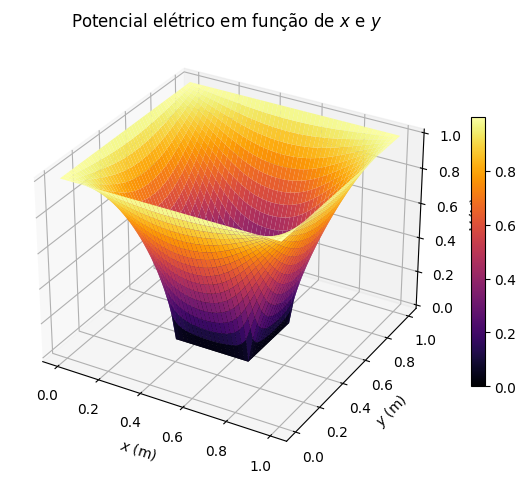

In [13]:
X_1 = np.linspace(0.0, Lx_1, dim_1[0])
Y_1 = np.linspace(0.0, Ly_1, dim_1[1])
X_1, Y_1 = np.meshgrid(X_1, Y_1)
X_1 = X_1.transpose()
Y_1 = Y_1.transpose()

fig_1, ax_1 = plt.subplots(subplot_kw={"projection": "3d"})
plot_V_1 = ax_1.plot_surface(X_1, Y_1, V_1, cmap=cm.inferno)
ax_1.set_title('Potencial elétrico em função de $x$ e $y$')
ax_1.set_xlabel('$x$ (m)')
ax_1.set_ylabel('$y$ (m)')
ax_1.set_zlabel('$V$ (V)')
# ax_1.set_aspect('equal')
fig_1.set_size_inches(tamanho_plot)

# ax_1.set_xlim(0, 1)
# ax_1.set_ylim(0, 1)
# ax_1.set_zlim(0, 1)

# ax_1.zaxis.set_major_locator(LinearLocator(10))
# ax_1.zaxis.set_major_formatter('{x:.02f}')

fig_1.colorbar(plot_V_1, shrink=0.5)  # , aspect=5)


In [14]:
Ex_1 = matrizes.campo_eletrico_x(V_1, dx=dx_1)
Ey_1 = matrizes.campo_eletrico_y(V_1, dy=dy_1)


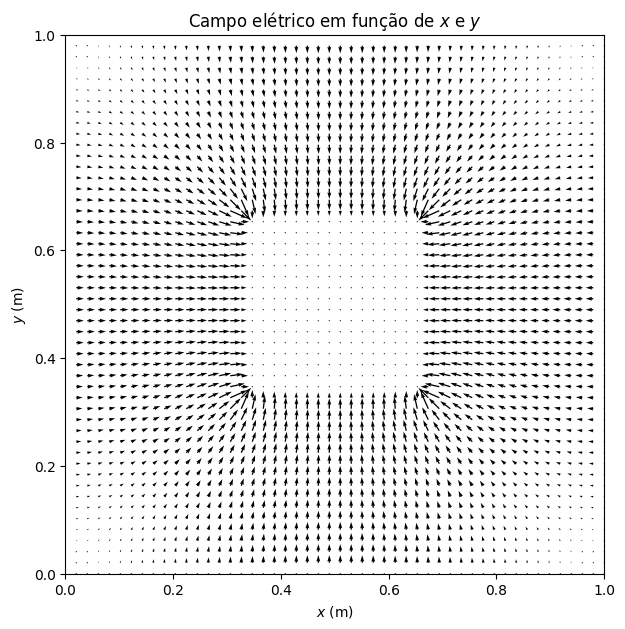

In [15]:
fig_1a, ax_1a = plt.subplots()
ax_1a.quiver(X_1, Y_1, Ex_1, Ey_1)

ax_1a.set_title('Campo elétrico em função de $x$ e $y$')
ax_1a.set_xlabel('$x$ (m)')
ax_1a.set_ylabel('$y$ (m)')
ax_1a.set_aspect('equal')

ax_1a.set_xlim(0, 1)
ax_1a.set_ylim(0, 1)

fig_1a.set_size_inches(tamanho_plot)


# Exercício 2

In [16]:
dim_2 = (100, 50)
Lx_2 = 2.0
Ly_2 = 1.0
dx_2 = Lx_2 / dim_2[0]
dy_2 = Ly_2 / dim_2[1]

V0_2 = matrizes.inicializar(dim=dim_2)
V0_2 = matrizes.metal_bordas(V0_2, 0.0)
V0_2 = matrizes.metal_placas(V0_2, 25)

# matrizes.mprint(V0_2)

V_2 = laplace_2d(V0_2, printar=True)
# matrizes.mprint(V_2)


O programa fez 2738 iterações.


## 2.(a)

In [17]:
Ex_2 = matrizes.campo_eletrico_x(V_2, dx_2)
Ey_2 = matrizes.campo_eletrico_y(V_2, dy_2)

absE_2 = np.sqrt(Ex_2**2 + Ey_2**2)


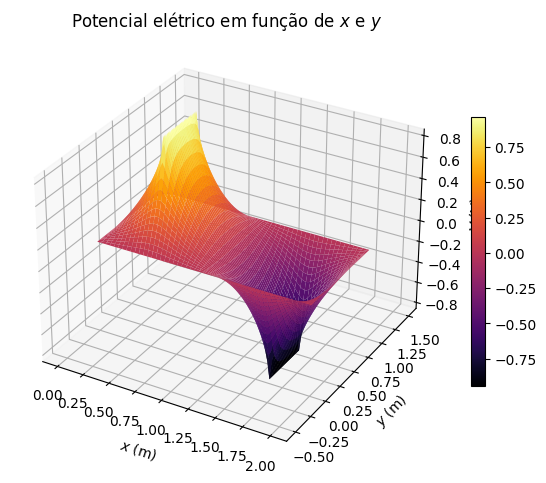

In [18]:
X_2 = np.linspace(0.0, Lx_2, dim_2[0])
Y_2 = np.linspace(0.0, Ly_2, dim_2[1])
Xm_2, Ym_2 = np.meshgrid(X_2, Y_2)
Xm_2 = Xm_2.transpose()
Ym_2 = Ym_2.transpose()

fig_2, ax_2 = plt.subplots(subplot_kw={"projection": "3d"})
plot_V_2 = ax_2.plot_surface(Xm_2, Ym_2, V_2, cmap=cm.inferno)
ax_2.set_title('Potencial elétrico em função de $x$ e $y$')
ax_2.set_xlabel('$x$ (m)')
ax_2.set_ylabel('$y$ (m)')
ax_2.set_zlabel('$V$ (V)')
ax_2.set_aspect('equal')
fig_2.set_size_inches(tamanho_plot)

fig_2.colorbar(plot_V_2, shrink=0.5)


## 2.(b)

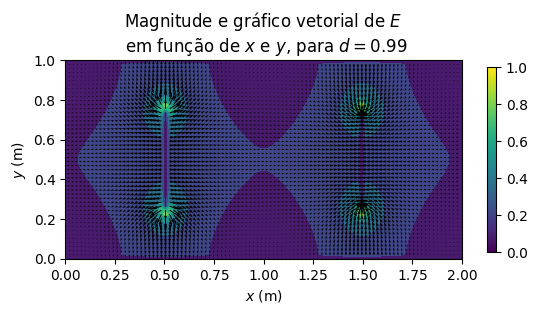

In [19]:
d_2 = X_2[-(25 + 1)] - X_2[25]

fig_2b1, ax_2b1 = plt.subplots()
plot_V_2b1 = ax_2b1.contourf(Xm_2, Ym_2, absE_2)
plot_V_2b1 = ax_2b1.quiver(Xm_2, Ym_2, Ex_2, Ey_2)
ax_2b1.set_title(
    'Magnitude e gráfico vetorial de $E$ \n em função de $x$ e $y$, para $d = {:.2f}$'.format(d_2))
ax_2b1.set_xlabel('$x$ (m)')
ax_2b1.set_ylabel('$y$ (m)')
ax_2b1.set_aspect('equal')
fig_2.set_size_inches(tamanho_plot)

fig_2b1.colorbar(plot_V_2b1, shrink=0.5)


In [20]:
dim_2b = (100, 50)
Lx_2b = 2.0
Ly_2b = 1.0
dx_2b = Lx_2b / dim_2b[0]
dy_2b = Ly_2b / dim_2b[1]

V0_2b = matrizes.inicializar(dim=dim_2b)
V0_2b = matrizes.metal_bordas(V0_2b, 0.0)
V0_2b = matrizes.metal_placas(V0_2b, 45)

# matrizes.mprint(V0_2b)

V_2b = laplace_2d(V0_2b, printar=True)
# matrizes.mprint(V_2b)


O programa fez 5331 iterações.


In [21]:
Ex_2b = matrizes.campo_eletrico_x(V_2b, dx_2)
Ey_2b = matrizes.campo_eletrico_y(V_2b, dy_2)

absE_2b = np.sqrt(Ex_2b**2 + Ey_2b**2)


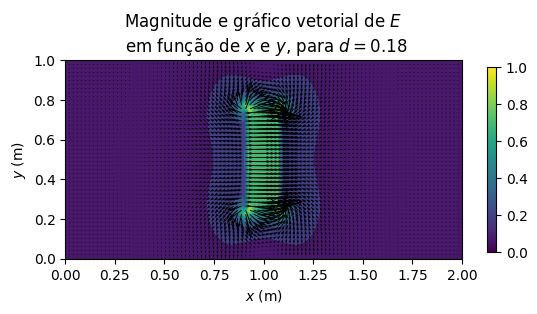

In [22]:
d_2b = X_2[-(45 + 1)] - X_2[45]

fig_2b2, ax_2b2 = plt.subplots()
plot_V_2b2 = ax_2b2.contourf(Xm_2, Ym_2, absE_2b)
plot_V_2b2 = ax_2b2.quiver(Xm_2, Ym_2, Ex_2b, Ey_2b)
ax_2b2.set_title(
    'Magnitude e gráfico vetorial de $E$ \n em função de $x$ e $y$, para $d = {:.2f}$'.format(d_2b))
ax_2b2.set_xlabel('$x$ (m)')
ax_2b2.set_ylabel('$y$ (m)')
ax_2b2.set_aspect('equal')
fig_2.set_size_inches(tamanho_plot)

fig_2b2.colorbar(plot_V_2b2, shrink=0.5)


In [23]:
np.full((3, 3, 3), 1.0)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

# Exercício 3

In [23]:
dim_3 = (31, 31, 31)
Lx_3 = 1.0
Ly_3 = 1.0
Lz_3 = 1.0
dx_3 = Lx_3 / dim_3[0]
V0_3 = tensor3.inicializar(dim=dim_3)
V0_3 = tensor3.metal_bordas(V0_3, 0.0)

rho_3 = tensor3.carga_puntiforme(
    dim=dim_3,
    dx=dx_3,
    indices=(2, int(dim_3[1] / 2), int(dim_3[2] / 2)),
    q=-1e-10
)

indice = int(dim_3[0] / 2)

V_3 = poisson_3d(V0_3, dx_3, rho_3, printar=True)


O programa fez 3102 iterações.


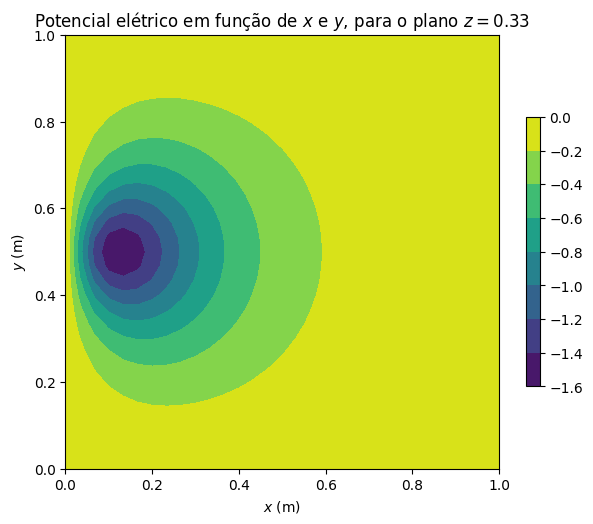

In [24]:
k_xy = int(dim_3[2] / 3)
Vxy_3 = tensor3.secao_xy(V_3, k_xy)

X_3 = np.linspace(0.0, Lx_3, dim_3[0])
Y_3 = np.linspace(0.0, Ly_3, dim_3[1])
Z_3 = np.linspace(0.0, Lz_3, dim_3[2])
Xm_3, Ym_3 = np.meshgrid(X_3, Y_3)
Xm_3 = Xm_3.transpose()
Ym_3 = Ym_3.transpose()

zk_xy = Z_3[k_xy]
zk_xy_str = '{:.2f}'.format(zk_xy)

fig_3, ax_3 = plt.subplots()
plot_V_3 = ax_3.contourf(Xm_3, Ym_3, Vxy_3)
ax_3.set_title(
    'Potencial elétrico em função de $x$ e $y$, para o plano $z = {:.2f}$'.format(zk_xy))
ax_3.set_xlabel('$x$ (m)')
ax_3.set_ylabel('$y$ (m)')
ax_3.set_aspect('equal')
# ax_3.set_zlabel('$V$ (V)')
fig_3.set_size_inches(tamanho_plot)

# ax_3.set_xlim(0, 1)
# ax_3.set_ylim(0, 1)
# ax_3.set_zlim(0, 1)

fig_3.colorbar(plot_V_3, shrink=0.5)  # , aspect=5)


In [25]:
print(X_3[2])
print(Y_3[int(dim_3[1] / 2)])
print(Z_3[int(dim_3[2] / 2)])

0.06666666666666667
0.5
0.5


# Exemplo do Giordano

$$ y(n + 1, i) = 2 \left[ 1 - r^2 \right] y(n, i) - y(n - 1, i) + r^2 \left[ y(n, i + 1) + y(n, i - 1) \right] $$

In [26]:
# L_ex2 = 1.0  # m
# c_ex2 = 300.0  # m/s
# dx_ex2 = 0.01  # m
# dt_ex2 = dx_ex2 / c_ex2
# n_ex2 = int(L_ex2 / dx_ex2)

# t_f_ex2 = L_ex2 / c_ex2

# x0_ex2 = 0.3  # m
# k_ex2 = 1000  # m^-2

# x_ex2 = np.linspace(0, L_ex2, n_ex2)
# y0_ex2 = np.exp(- k_ex2 * (x_ex2 - x0_ex2)**2)
# y0_ex2 = list(y0_ex2)
# y0_ex2[0] = 0.0
# y0_ex2[-1] = 0.0

# y_ex2 = edp.propagate(
#     y_x0=y0_ex2,
#     t_f=t_f_ex2,
#     dx=dx_ex2,
#     c=c_ex2,
# )

# # print(len(y_ex2))

# # plt.plot(x_ex2, y_ex2[-7])


# Exercício 4

## $r = 1$

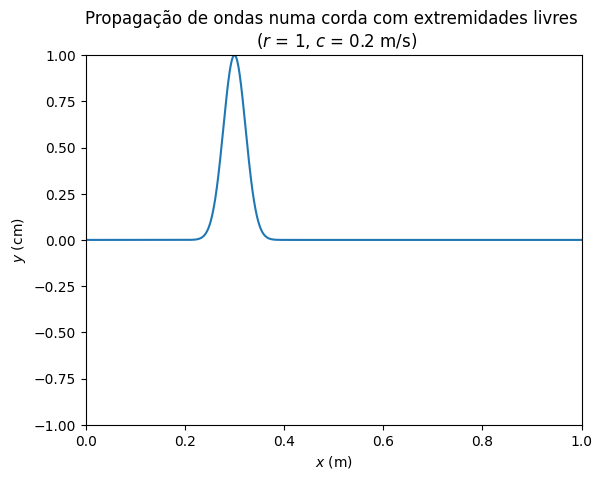

In [27]:
L_4 = 1.0  # m
c_4 = 0.2  # 300.0  # m/s
dx_4 = 0.001  # m
dt_4 = dx_4 / c_4
I_4 = int(L_4 / dx_4)

t_f_4 = 2 * L_4 / c_4

x0_4 = 0.3  # m
k_4 = 1000  # m^-2

x_4 = np.linspace(0, L_4, I_4)
y0_4 = np.exp(- k_4 * (x_4 - x0_4)**2)
y0_4[0] = 0.0
y0_4[-1] = 0.0

y_4 = propagate(
    y_x0=y0_4,
    t_f=t_f_4,
    dx=dx_4,
    c=c_4,
    pe='solta',
    pd='solta'
)

N_4 = np.shape(y_4)[1]

fig_4, ax_4 = plt.subplots()

ax_4.set_xlim(0, 1)
ax_4.set_ylim(-1, 1)
ax_4.set_title('Propagação de ondas numa corda com extremidades livres \n ($r$ = 1, $c$ = 0.2 m/s)')
ax_4.set_xlabel('$x$ (m)')
ax_4.set_ylabel('$y$ (cm)')

line_4, = ax_4.plot(x_4, y_4[:, 0])


def ondas_1(n):
    line_4.set_ydata(y_4[:, n])
    return line_4,


ani_4 = animation.FuncAnimation(
    fig=fig_4,
    func=ondas_1,
    frames=N_4,
    interval=dt_4 * 1000,
    blit=True,
    repeat=True
)


## $r < 1$

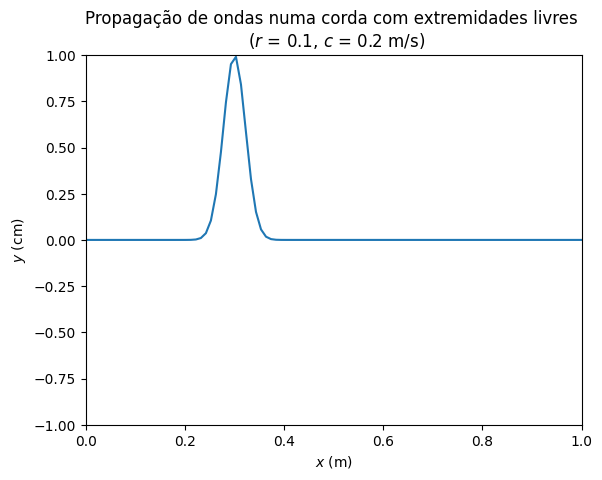

In [28]:
L_4a = 1.0  # m
c_4a = 0.2  # 300.0  # m/s
dx_4a = 0.01  # m
dt_4a = 0.005  # s
I_4a = int(L_4a / dx_4a)

r_4a = c_4a * dt_4a / dx_4a

t_f_4a = 2 * L_4a / c_4a

x0_4a = 0.3  # m
k_4a = 1000  # m^-2

x_4a = np.linspace(0, L_4a, I_4a)
y0_4a = np.exp(- k_4a * (x_4a - x0_4a)**2)
y0_4a[0] = 0.0
y0_4a[-1] = 0.0

y_4a = propagate(
    y_x0=y0_4a,
    t_f=t_f_4a,
    dx=dx_4a,
    dt=dt_4a,
    c=c_4a,
    pe='solta',
    pd='solta'
)

N_4a = np.shape(y_4a)[1]

fig_4a, ax_4a = plt.subplots()

ax_4a.set_xlim(0, 1)
ax_4a.set_ylim(-1, 1)
ax_4a.set_title('Propagação de ondas numa corda com extremidades livres \n ($r$ = 0.1, $c$ = 0.2 m/s)')
ax_4a.set_xlabel('$x$ (m)')
ax_4a.set_ylabel('$y$ (cm)')

line_4a, = ax_4a.plot(x_4a, y_4a[:, 0])


def ondas_2(n):
    line_4a.set_ydata(y_4a[:, n])
    return line_4a,


ani_4a = animation.FuncAnimation(
    fig=fig_4a,
    func=ondas_2,
    frames=N_4a,
    interval=dt_4a * 1000,
    blit=True,
    repeat=True
)


## $r > 1$

In [31]:
L_4b = 1.0  # m
c_4b = 0.2  # 300.0  # m/s
dx_4b = 0.01  # m
dt_4b = 0.1  # s
I_4b = int(L_4b / dx_4b)

r_4b = c_4b * dt_4b / dx_4b

t_f_4b = 2 * L_4b / c_4b

x0_4b = 0.3  # m
k_4b = 1000  # m^-2

x_4b = np.linspace(0, L_4b, I_4b)
y0_4b = np.exp(- k_4b * (x_4b - x0_4b)**2)
y0_4b[0] = 0.0
y0_4b[-1] = 0.0

y_4b = propagate(
    y_x0=y0_4b,
    t_f=t_f_4b,
    dx=dx_4b,
    dt=dt_4b,
    c=c_4b,
    pe='solta',
    pd='solta'
)

N_4b = np.shape(y_4b)[1]

fig_4b, ax_4b = plt.subplots()

ax_4b.set_xlim(0, 1)
ax_4b.set_ylim(-1, 1)
ax_4b.set_title('Propagação de ondas numa corda com extremidades livres \n ($r$ = 2, $c$ = 0.2 m/s)')
ax_4b.set_xlabel('$x$ (m)')
ax_4b.set_ylabel('$y$ (cm)')

line_4b, = ax_4b.plot(x_4b, y_4b[:, 0])


def ondas_3(n):
    line_4b.set_ydata(y_4b[:, n])
    return line_4b,


ani_4b = animation.FuncAnimation(
    fig=fig_4b,
    func=ondas_3,
    frames=N_4b,
    interval=dt_4b * 1000,
    blit=True,
    repeat=True
)


NameError: name 'propagate' is not defined

In [30]:
# fig_1.savefig('lista02/imagem1_V1.pdf')
# fig_1a.savefig('lista02/imagem1_E1.pdf')

# fig_2.savefig('lista02/imagem2_V2.pdf')
# fig_2b1.savefig('lista02/imagem2_E2.pdf')
# fig_2b2.savefig('lista02/imagem2_E2b.pdf')

# fig_3.savefig('lista02/imagem3.pdf')

# ani_4.save('lista02/video_ondas1.mp4', dpi=100)  # , bitrate=-1)
# ani_4a.save('lista02/video_ondas2.mp4', dpi=100)
# ani_4b.save('lista02/video_ondas3.mp4', dpi=100)
